In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from utils import print_nb_info, check_dir, SineModel

In [2]:
print_nb_info()

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.4.0
TensorFlow GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
rcParams['font.size'] = '12'
rcParams['figure.figsize'] = (6.4, 4.8)
plt.rc('mathtext', fontset='cm')

In [9]:
SAVEFIG: bool = True
FIG_EXT: str = 'pdf'
FIG_PATH: Path = Path('./out/plots/linreg')

In [5]:
check_dir(FIG_PATH)

This directory exists: WindowsPath('C:/Users/YBant/Documents/projects/deep_learning/rnn/out/plots/linreg')


## 1. Sine wave forecasting

In [6]:
sm = SineModel(noise=False, T=10, fig_path=FIG_PATH, fig_ext=FIG_EXT)

In [7]:
r = sm.build_train_linreg(verbose=True, epochs=80, loss='mse', lr=0.1)

Epoch 1/80
3/3 [==============================] - 2s 571ms/step - loss: 0.4521 - val_loss: 0.3081
Epoch 2/80
3/3 [==============================] - 0s 27ms/step - loss: 0.3188 - val_loss: 0.0040
Epoch 3/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0377 - val_loss: 0.1578
Epoch 4/80
3/3 [==============================] - 0s 30ms/step - loss: 0.1708 - val_loss: 0.0047
Epoch 5/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0196 - val_loss: 0.0853
Epoch 6/80
3/3 [==============================] - 0s 32ms/step - loss: 0.0784 - val_loss: 0.0071
Epoch 7/80
3/3 [==============================] - 0s 31ms/step - loss: 0.0064 - val_loss: 0.0306
Epoch 8/80
3/3 [==============================] - 0s 31ms/step - loss: 0.0309 - val_loss: 0.0126
Epoch 9/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0049 - val_loss: 0.0095
Epoch 10/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0153 - val_loss: 0.0050
Epoch 11/80
3/3 [===========

3/3 [==============================] - 0s 26ms/step - loss: 7.6578e-12 - val_loss: 7.9428e-12
Epoch 80/80
3/3 [==============================] - 0s 25ms/step - loss: 1.0307e-11 - val_loss: 9.9448e-12


Figure successfully saved in out\plots\linreg\loss_linreg


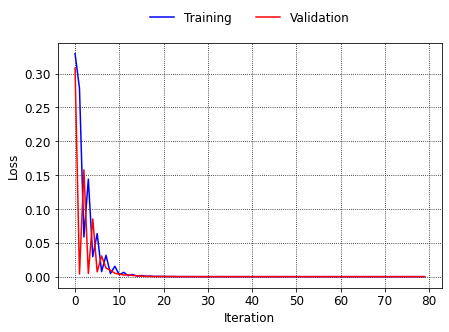

In [10]:
sm.plot_loss(save=SAVEFIG, imgname='loss_linreg')

In [12]:
sm.predict(is_wrong=True)

WRONG FORECAST (-> the forecast is subject to 'look-ahead bias')


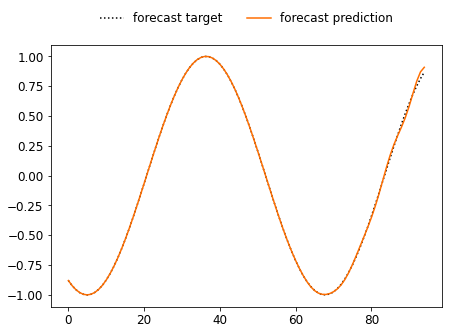

In [15]:
sm.plot_target_vs_prediction(save=SAVEFIG, imgname='pred_linreg_one_step')

In [14]:
sm.predict(is_wrong=False)

RIGHT FORECAST (-> the forecast does not exhibit 'look-ahead bias')


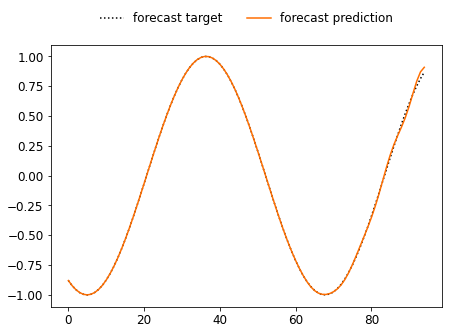

In [16]:
sm.plot_target_vs_prediction(save=SAVEFIG, imgname='pred_linreg_multi_step')

## 2. Noisy sine wave forecast

Epoch 1/80
3/3 [==============================] - 0s 63ms/step - loss: 0.2194 - val_loss: 0.1703
Epoch 2/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1062 - val_loss: 0.1094
Epoch 3/80
3/3 [==============================] - 0s 19ms/step - loss: 0.1256 - val_loss: 0.0594
Epoch 4/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0552 - val_loss: 0.0620
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0615 - val_loss: 0.0883
Epoch 6/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0657 - val_loss: 0.0470
Epoch 7/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0410 - val_loss: 0.0580
Epoch 8/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0384 - val_loss: 0.0464
Epoch 9/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0427 - val_loss: 0.0420
Epoch 10/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0339 - val_loss: 0.0450
Epoch 11/80
3/3 [============

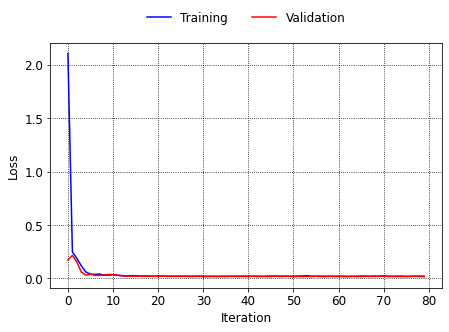

In [19]:
smn = SineModel(noise=True, T=10, fig_path=FIG_PATH, fig_ext=FIG_EXT)
r = smn.build_train_linreg(verbose=True, epochs=80, loss='mse', lr=0.1)
sm.plot_loss(save=SAVEFIG, imgname='loss_linreg_noise')

WRONG FORECAST (-> the forecast is subject to 'look-ahead bias')


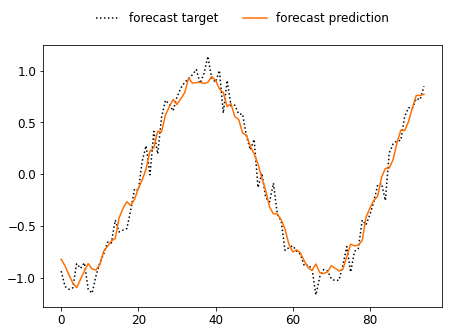

In [20]:
smn.predict(is_wrong=True)
smn.plot_target_vs_prediction(save=SAVEFIG, imgname='pred_linreg_one_step_noise')

RIGHT FORECAST (-> the forecast does not exhibit 'look-ahead bias')


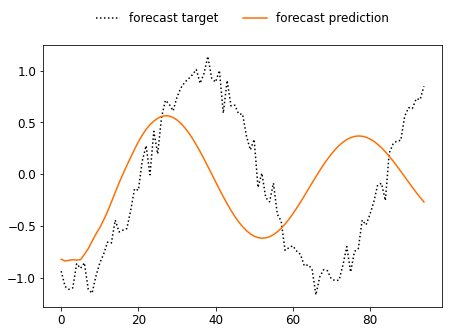

In [21]:
smn.predict(is_wrong=False)
smn.plot_target_vs_prediction(save=SAVEFIG, imgname='pred_linreg_multi_step_noise')